## [nn.Module的使用](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)
Base class for all neural network modules.Your models should also subclass this class.


In [1]:
import matplotlib.pyplot as plt
import torchvision.datasets

"""
Template:

import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
"""

import torch
from torch import nn

class MyNet(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self,input):
        output=input+1
        return output

myNet=MyNet()
x=torch.tensor(1.0)
output=myNet(x)
output

tensor(2.)

### 1. [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)

Applies a 2D convolution over an input signal composed of several input planes.

我们可以设计一个卷积核来检测图像的边缘。

#### 1.1 [TORCH.NN.FUNCTIONAL.CONV2D](https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html#torch.nn.functional.conv2d)

In [3]:
"""
torch.nn.functional.conv2d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1)
- input: input tensor of shape (minibatch,in_channels,H,W)
- weight: filters of shape (out_channels,in_channels/groups,H,W)
"""
input=torch.tensor([[1,2,0,3,1],
                    [0,1,2,3,1],
                    [1,2,1,0,0],
                    [5,2,3,1,1],
                    [2,1,0,1,1]])
kernel=torch.tensor([[1,2,1],
                     [0,1,0],
                     [2,1,0]])

input.shape,kernel.shape

(torch.Size([5, 5]), torch.Size([3, 3]))

In [4]:
"""
调用torch.reshape满足参数要求
"""
input=torch.reshape(input,[1,1,5,5])
kernel=torch.reshape(kernel,[1,1,3,3])
input.shape,kernel.shape

(torch.Size([1, 1, 5, 5]), torch.Size([1, 1, 3, 3]))

In [6]:
import torch.nn.functional as F
output=F.conv2d(input,kernel,stride=1)
output,output.shape

(tensor([[[[10, 12, 12],
           [18, 16, 16],
           [13,  9,  3]]]]),
 torch.Size([1, 1, 3, 3]))

In [39]:
"""
二维卷积 Conv2d

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
- in_channels:(N,C,H,W), N is a batch size, C denotes a number of channels, H is a height of input planes in pixels, and W is width in pixels.

"""
import torchvision

# 自定义数据集存放位置
dataDir='/media/zhang/Disk0/dataset/d2l/data'

# 构造数据集
dataset=torchvision.datasets.CIFAR10(
    root=dataDir,
    train=True,
    transform=torchvision.transforms.ToTensor(),
)

dataset.__len__()

50000

In [40]:
from torch.nn import Conv2d
from torch.utils.data import DataLoader
# 构造数据加载器
dataloader=DataLoader(dataset,
                      batch_size=64,
                      shuffle=True,
                      num_workers=8)


In [11]:

# 搭建神经网络
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=Conv2d(in_channels=3,out_channels=6,kernel_size=3,stride=1,padding=0)


    def forward(self,x):
        x=self.conv1(x)
        return x

myConvNet=MyConvNet()
myConvNet  # 查看网络结构

MyConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
)

In [20]:
data=next(enumerate(dataloader))
img,tag=data[1][0],data[1][1]  # 获取第一批dataloader的内容（64个图片+标签）
img.shape,tag.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [19]:
img1=img[0]  # 64张图片中的第一个图片
img1.shape

torch.Size([3, 32, 32])

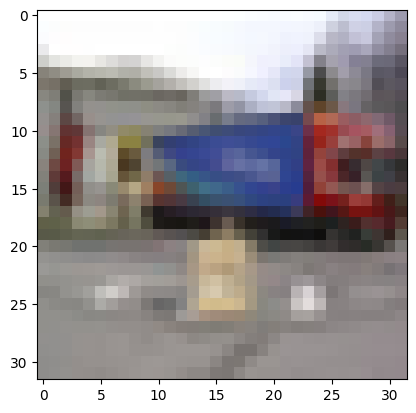

In [23]:
from torchvision import transforms
import matplotlib.pyplot as plt

transToPIL=transforms.ToPILImage('RGB')  # Convert a tensor or an ndarray to PIL Image.

plt.imshow(transToPIL(img1))

In [21]:
output=myConvNet(img1)
output.shape

torch.Size([6, 30, 30])

In [24]:
plt.imshow(transToPIL(output))  # 画不出来

ValueError: pic should not have > 4 channels. Got 6 channels.

In [27]:
from torch.utils.tensorboard import SummaryWriter

"""
使用tensorboard进行可视化
"""

writer=SummaryWriter('./runsLog/conv2d')

step=0
for data in dataloader:
    imgs,tag=data
    output=myConvNet(imgs)
    # torch.Size([64, 3, 32, 32]
    writer.add_images('input',imgs,step)

    # torch.Size([64, 6, 32, 32] -> torch.Size([xx, 3, 32, 32]
    output=torch.reshape(output,(-1,3,30,30))
    writer.add_images('output',output,step)
    step=step+1

writer.close()


In [ ]:
# 查看效果
!tensorboard --logdir=/home/zhang/PycharmProjects/d2l/zhang/chap0/pytorch/conv2d

### 2. [Pooling layers](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
使用最大汇聚层以及大于1的步幅，可减少空间维度（如高度和宽度），减少数据运算量

In [ ]:
"""
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

- ceil_mode (bool) – when True, will use ceil instead of floor to compute the output shape
"""

In [37]:
from torch.nn import MaxPool2d


class MyPoolNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.maxpool=MaxPool2d(kernel_size=3,ceil_mode=False)

    def forward(self,input):
        output=self.maxpool(input)
        return output


In [38]:
myPoolNet=MyPoolNet()
writer=SummaryWriter('./runsLog/maxpool')

step=0
for data in dataloader:
    imgs,tag=data
    output=myPoolNet(imgs)
    # torch.Size([64, 3, 32, 32]
    writer.add_images('input',imgs,step)
    writer.add_images('output',output,step)
    step=step+1

writer.close()

In [ ]:
# 查看效果
!tensorboard --logdir=/home/zhang/PycharmProjects/d2l/zhang/chap0/pytorch/maxpool

### 3. Non-linear Activations
为网络引入更多的非线性特征


In [42]:
writer=SummaryWriter('./runsLog/nonLinear')

m=nn.Sigmoid()

step=0
for data in dataloader:
    imgs,tag=data
    output=m(imgs)
    # torch.Size([64, 3, 32, 32]
    writer.add_images('input',imgs,step)
    writer.add_images('output',output,step)
    step=step+1

writer.close()

In [ ]:
# 查看效果
!tensorboard --logdir=/home/zhang/PycharmProjects/d2l/zhang/chap0/pytorch/nonLinear

### 4. Linear Layers
#### nn.Linear
Applies a linear transformation to the incoming data: $y=xA^T+b$

In [50]:
"""
torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
"""
m=nn.Linear(20,10)
input=torch.randn(128,20)
input,input.shape

(tensor([[ 0.5493, -0.7204, -1.6284,  ...,  1.0329, -2.1003, -0.3053],
         [ 0.5471, -1.0510,  1.2853,  ...,  1.0822, -0.6689, -0.1528],
         [-0.5086,  0.0537,  1.4336,  ...,  0.2113,  0.4385,  0.5704],
         ...,
         [ 0.7557,  0.3367, -0.4350,  ...,  1.3493, -1.0269,  0.3579],
         [-0.4948, -0.5987,  0.1063,  ..., -0.7283, -0.5547, -0.0756],
         [-0.9159,  0.1178,  2.3531,  ...,  1.2157,  0.4289,  0.9492]]),
 torch.Size([128, 20]))

In [48]:
help(torch.randn)

Help on built-in function randn in module torch:

randn(...)
    randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    
    Returns a tensor filled with random numbers from a normal distribution
    with mean `0` and variance `1` (also called the standard normal
    distribution).
    
    .. math::
        \text{out}_{i} \sim \mathcal{N}(0, 1)
    
    The shape of the tensor is defined by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword args:
        generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses

In [51]:
output=m(input)
output,output.shape

(tensor([[-0.1623,  0.0590,  0.5484,  ...,  0.2414,  0.3306, -0.1461],
         [-0.2615, -0.3129, -0.4131,  ...,  1.1545, -0.6724, -0.7671],
         [-0.2735, -0.1474, -0.7691,  ...,  1.0947,  0.2924,  0.0513],
         ...,
         [ 0.5980,  0.0273,  0.1005,  ..., -0.3917,  0.9769, -0.5045],
         [ 0.3824, -0.9847, -0.9157,  ...,  0.1524,  0.2945,  0.0453],
         [-0.5881,  0.0184,  0.5428,  ...,  0.2795, -0.0060, -0.9985]],
        grad_fn=<AddmmBackward0>),
 torch.Size([128, 10]))

In [52]:
dir(m)  # 可通过m.weight和m.bias设置该线性层的权值和偏置

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_d

### 5. [sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential)

A sequential container.
Modules will be added to it in the order they are passed in the constructor. Alternatively, an `OrderedDict` of modules can be passed in. The `forward()` method of `Sequential` accepts any input and forwards it to the first module it contains. It then “chains” outputs to inputs sequentially for each subsequent module, finally returning the output of the last module.

The value a `Sequential` provides over manually calling a sequence of modules is that it allows treating the whole container as a single module, such that performing a transformation on the `Sequential` applies to each of the modules it stores (which are each a registered submodule of the `Sequential`).

In [54]:
from torch.nn import Flatten, Linear
from collections import OrderedDict

"""
torch.nn.Sequential(*args: Module)

torch.nn.Sequential(arg: OrderedDict[str, Module])
"""

model = nn.Sequential(
            nn.Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            nn.Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            nn.Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )

writer=SummaryWriter('./runsLog/sequential')

# get some random training images
# 注意这种写法
dataiter=iter(dataloader)
images,labels=next(dataiter)

"""
visualize complex model structures.
"""
writer.add_graph(model,images)
writer.close()

In [ ]:
# 查看效果
!tensorboard --logdir= /home/zhang/PycharmProjects/d2l/zhang/chap0/pytorch/sequential